In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
archivo = "dataset/Estadisticas_historicas_comercializacion.xlsx"

df_importacion = pd.read_excel(archivo, sheet_name="IMPORTACION", skiprows=6, nrows=289 )
df_consumo = pd.read_excel(archivo, sheet_name="CONSUMO", skiprows=6, nrows=301 ) 
#Aca arriba lo que hicimos fue leer los archivos de excel y saltar las primeras 6 filas que son encabezados y no nos interesan.
#Tambien especificamos el numero de filas que queremos leer, en este caso 289 para importacion y 301 para consumo.

# Renombrar columnas para facilitar
cols_import = df_importacion.columns.tolist()
cols_consumo = df_consumo.columns.tolist()

print("Columnas Importación:")
print(cols_import)

print("\nColumnas Consumo:")
print(cols_consumo)

Columnas Importación:
['Fecha', 'Aceites lubricantes', 'Asfalto ', 'Bunker', 'Ceras', 'Combustible turbo jet', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gas licuado de petróleo', 'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior', 'Grasas lubricantes', 'Kerosina', 'Mezclas oleosas', 'Naftas', 'Petcoke', 'Petróleo crudo', 'Solventes', 'Butano', 'Diesel alto azufre', 'MTBE', 'Orimulsión', 'Petróleo reconstituido', 'Total importación']

Columnas Consumo:
['Fecha', 'Aceites lubricantes', 'Asfalto', 'Bunker', 'Ceras', 'Combustible turbo jet', 'Diesel bajo azufre', 'Diesel ultra bajo azufre', 'Gas licuado de petróleo', 'Gas natural', 'Gasolina de aviación', 'Gasolina regular', 'Gasolina superior', 'Grasas lubricantes', 'Kerosina', 'Mezclas\noleosas', 'Naftas', 'PetCoke', 'Petróleo crudo', 'Solventes', 'Butano', 'Diesel alto azufre', 'Orimulsión', 'Total']


Bien logramos identificar las columnas importantes ahora vamos a solo a agarrar las que nos interesan. 

In [16]:
df_importacion = df_importacion[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']]
df_consumo = df_consumo[['Fecha', 'Gasolina regular', 'Gasolina superior', 'Diesel alto azufre']]


Vamos a analizar como viene formateada la fecha.. 

In [17]:
print(df_importacion['Fecha'].head())

0   2001-01-01
1   2001-02-01
2   2001-03-01
3   2001-04-01
4   2001-05-01
Name: Fecha, dtype: datetime64[ns]


MMm es tipo object asi que la vamos a transformar a datetime

In [18]:
df_importacion['Fecha'] = pd.to_datetime(df_importacion['Fecha'])
df_consumo['Fecha'] = pd.to_datetime(df_consumo['Fecha'])

In [19]:
print(df_importacion['Fecha'].dtype)


datetime64[ns]


Ya que trabajaremos series de tiempo, conviene que Fecha sea el índice del dataframe:

In [20]:
df_importacion.set_index('Fecha', inplace=True)
df_consumo.set_index('Fecha', inplace=True)


In [21]:
print("Importación:")
print(f"Inicio: {df_importacion.index.min()}")
print(f"Fin: {df_importacion.index.max()}")
print(f"Número de registros: {len(df_importacion)}")

print("\nConsumo:")
print(f"Inicio: {df_consumo.index.min()}")
print(f"Fin: {df_consumo.index.max()}")
print(f"Número de registros: {len(df_consumo)}")


Importación:
Inicio: 2001-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Número de registros: 288

Consumo:
Inicio: 2000-01-01 00:00:00
Fin: 2024-12-01 00:00:00
Número de registros: 300


### Tenemos los datasets listos como para seguir con el analisis exploratorio

#### Vamos a analizar la importacion mensual

Gasolina regular

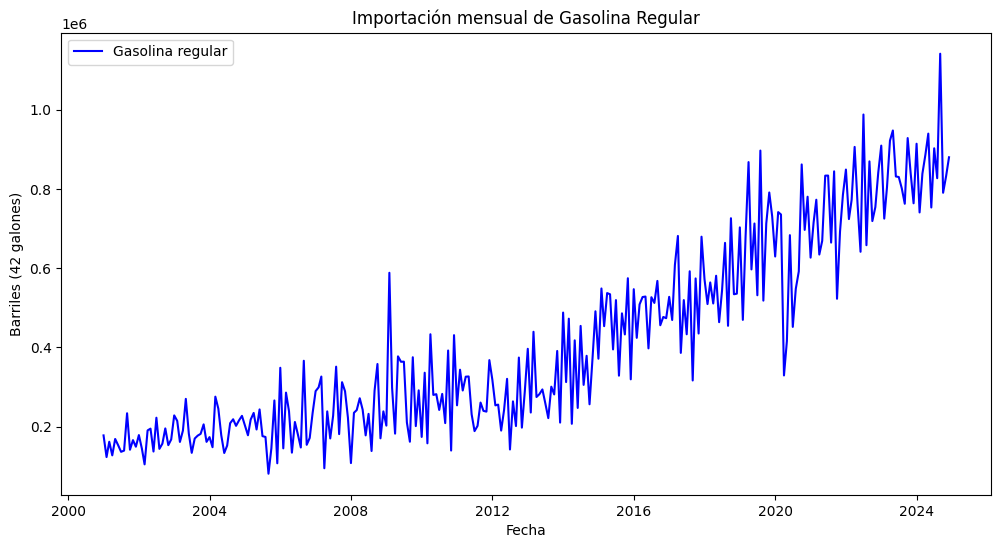

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df_importacion.index, df_importacion['Gasolina regular'], color='blue', label='Gasolina regular')
plt.title("Importación mensual de Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


- Claramente se observa una tendencia creciente a lo largo de los años.

- Desde niveles iniciales cercanos a ~150,000–200,000 barriles mensuales en 2001 hasta valores superiores al millón de barriles en 2024.

- Esto indica que la media de la serie no es constante: no es estacionaria en media.

- Esta tendencia probablemente está asociada al crecimiento vehicular a lo largo de los años

Evolución por año
- La serie muestra aumentos paulatinos, sin caídas prolongadas que rompan la tendencia general.
- Los que si se perciben son algunos picos muy notables y caídas en torno a 2008 (crisis financiera global) y entre 2020–2021 (pandemia).

Gasolina superior

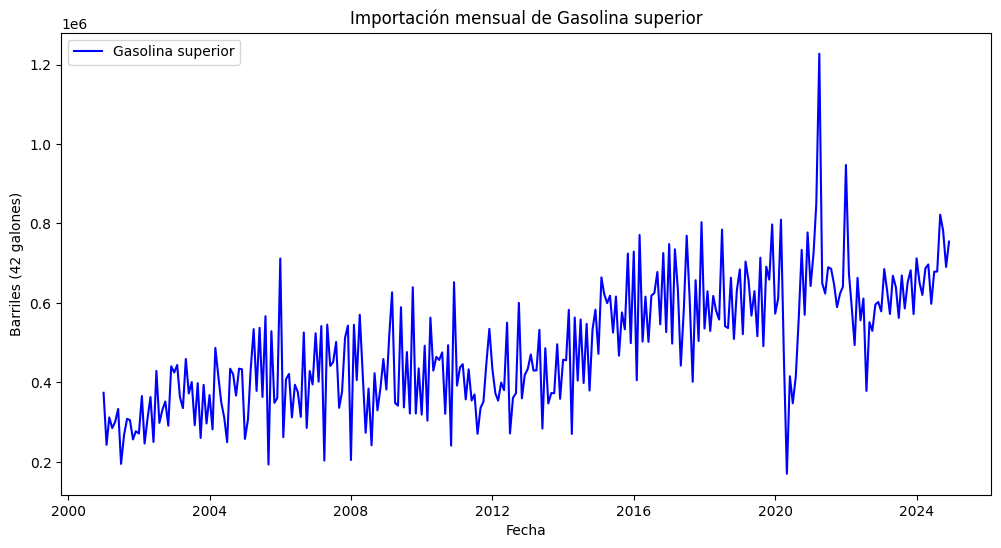

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df_importacion.index, df_importacion['Gasolina superior'], color='blue', label='Gasolina superior')
plt.title("Importación mensual de Gasolina superior")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

- La tendencia a lo largo del tiempo no es tan clara como en gasolina regular.

- Desde 2001 hasta ~2018 hay una ligera tendencia creciente, aunque con bastante variabilidad mensual.

- Después de 2018 la tendencia parece más plana, incluso con caídas abruptas en ciertos momentos.

- Esto sugiere que la media no es constante, pero tampoco muestra un crecimiento sostenido tan fuerte como la regular.

Evolucion por año
- Hasta 2019 hay una relativa estabilidad con variaciones normales.

- En 2020–2021 se observa un pico muy abrupto seguido por una caída drástica y una recuperación parcial posterior.

- Después de 2021 las importaciones no vuelven a los máximos previos, lo cual sugiere un cambio estructural en el consumo o las políticas de importación de gasolina superior.

Diesel alto azufre

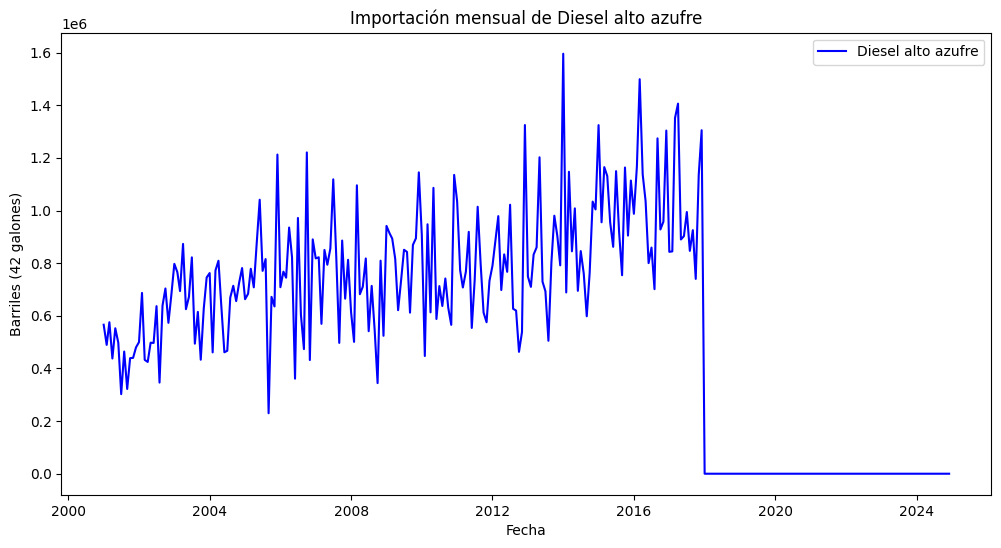

In [24]:
plt.figure(figsize=(12,6))
plt.plot(df_importacion.index, df_importacion['Diesel alto azufre'], color='blue', label='Diesel alto azufre')
plt.title("Importación mensual de Diesel alto azufre")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

- La serie muestra una clara tendencia creciente desde 2001 hasta aproximadamente 2008–2010, alcanzando niveles por encima de 1.2–1.5 millones de barriles.

- Después de 2010, la serie muestra fluctuaciones altas pero no un crecimiento sostenido.

- A partir de 2018–2019 la serie cae abruptamente a cero y permanece ahí hasta 2024.

Evolucion por año 

- La serie es bastante volátil entre 2004 y 2015, con varios picos y caídas abruptas.

- Desde 2018 en adelante la importación cae a cero y no se recupera en absoluto, investigando un poco de por que es esto es que dice que este cambio se implementó para cumplir con estándares ambientales y proteger los motores modernos. 


#### Consumo mensual

Gasolina regular

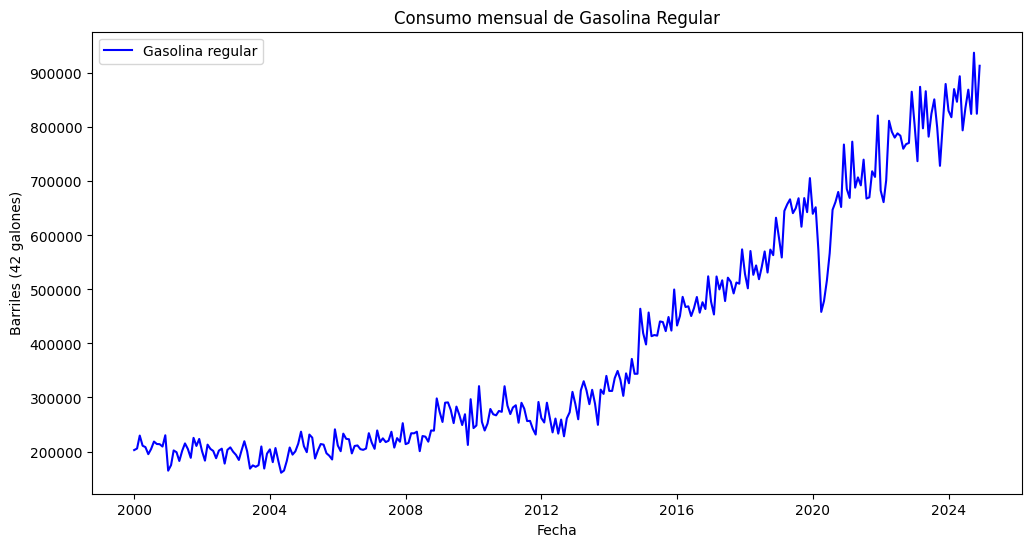

In [25]:
plt.figure(figsize=(12,6))
plt.plot(df_consumo.index, df_consumo['Gasolina regular'], color='blue', label='Gasolina regular')
plt.title("Consumo mensual de Gasolina Regular")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()


- La serie muestra una tendencia creciente clara y sostenida a lo largo de los años.

- Desde niveles de ~200,000 barriles en 2001 hasta más de 900,000 barriles hacia 2024.

- Esta tendencia implica que la media no es constante: no estacionaria en media.

- El patrón ascendente coincide con el crecimiento de poblacion por ende de vehiculos tambien. 

Evolucion por año 
- Hasta ~2015 la serie crece lentamente.

- Después de 2015 el crecimiento se acelera notablemente.

- En 2020–2021 (años de pandemia) hay una caída abrupta en medio de la tendencia creciente, seguida de recuperación rápida y continuidad de la tendencia ascendente.


Gasolina superior

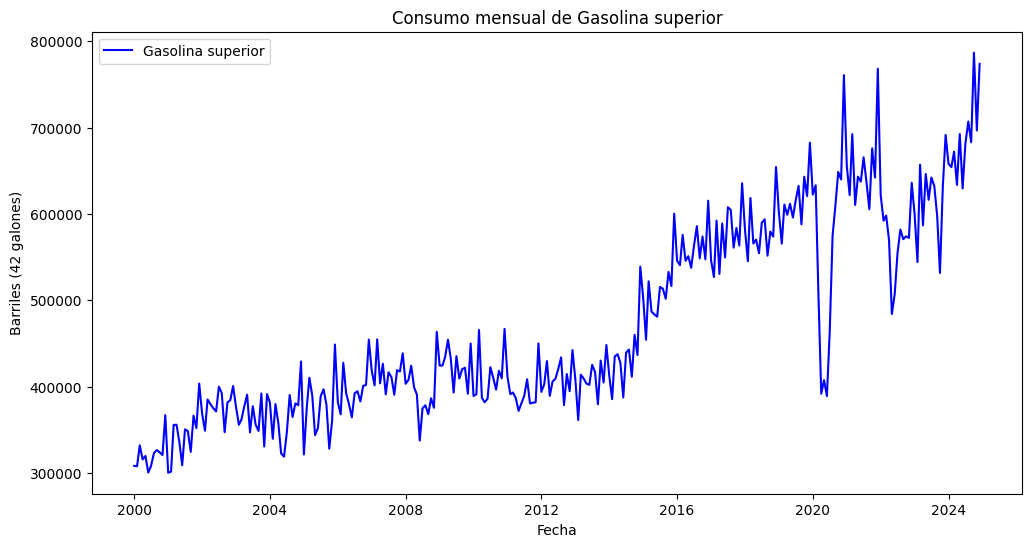

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df_consumo.index, df_consumo['Gasolina superior'], color='blue', label='Gasolina superior')
plt.title("Consumo mensual de Gasolina superior")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

- La serie muestra una tendencia creciente a largo plazo, pero más irregular que la de gasolina regular.

- Desde ~250,000 barriles en 2001 hasta ~750,000–800,000 barriles en 2024.

- Crecimiento sostenido aunque más interrumpido por fluctuaciones bruscas.

Evolucion por año 

- Entre 2001–2014 el consumo se mantiene relativamente estable con ligeras subidas.

- A partir de 2015 hay un incremento notable.

- En 2020–2021 (aca es mas notable los años de pandemia) aparecen fuertes caídas y picos, pero la serie retoma su tendencia ascendente en los últimos años.

Diesel alto azufre

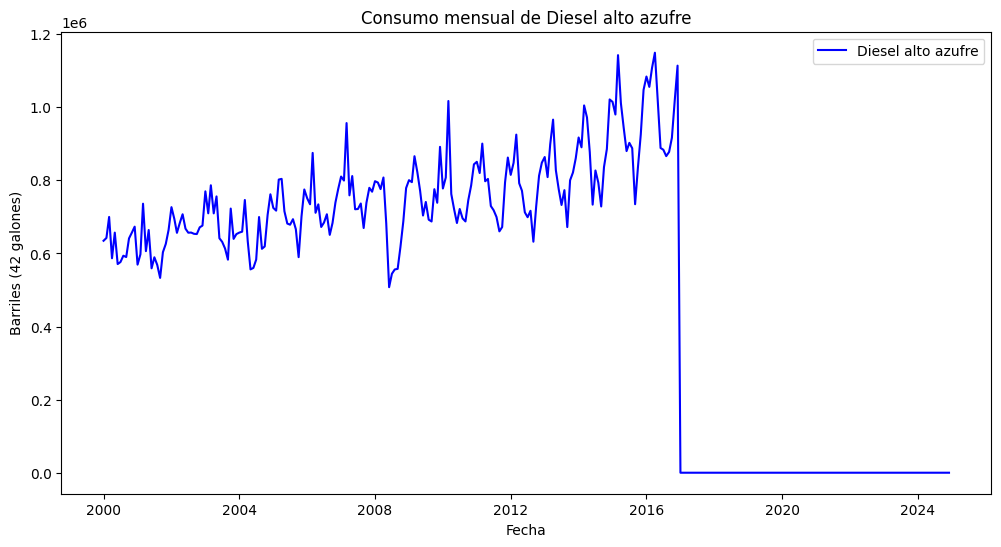

In [27]:
plt.figure(figsize=(12,6))
plt.plot(df_consumo.index, df_consumo['Diesel alto azufre'], color='blue', label='Diesel alto azufre')
plt.title("Consumo mensual de Diesel alto azufre")
plt.xlabel("Fecha")
plt.ylabel("Barriles (42 galones)")
plt.legend()
plt.show()

- Desde 2001 hasta aproximadamente 2015, la serie muestra un leve crecimiento y cierta estabilidad en torno a 700,000–900,000 barriles.

- Después de 2016, la serie cae abruptamente a cero y permanece en cero hasta 2024.

- La falta de consumo se debe a que ya no se importa ni se comercializa en guatemala. 

Evolucion por año
- La serie es relativamente estable en los primeros años, con pequeñas fluctuaciones alrededor de una media alta.

- Después de 2015, el consumo desaparece totalmente y no se recupera.

- La pandemia no tiene efecto aparente en esta serie porque para entonces ya no se comercializaba.

| Serie                                | Tendencia                        | Estacionalidad                | Pandemia (2020–21)          | Varianza         | Observaciones clave          |
| ------------------------------------ | -------------------------------- | ----------------------------- | --------------------------- | ---------------- | ---------------------------- |
| **Importación - Gasolina regular**   | Creciente                        | Posible anual                 | Leve caída + recuperación   | Creciente        | Serie muy clara para modelar |
| **Importación - Gasolina superior**  | Creciente irregular              | Posible anual                 | Pico abrupto + caída fuerte | Alta             | Más volátil que regular      |
| **Importación - Diesel alto azufre** | Creciente hasta 2015, luego cero | Posible anual en tramo activo | Sin efecto (ya en cero)     | Alta, luego nula | Cambio estructural tras 2015 |
| **Consumo - Gasolina regular**       | Creciente                        | Posible anual                 | Caída + recuperación        | Creciente        | Patrón similar a importación |
| **Consumo - Gasolina superior**      | Creciente irregular              | Posible anual                 | Caída fuerte + recuperación | Alta             | Muy volátil                  |
| **Consumo - Diesel alto azufre**     | Creciente hasta 2015, luego cero | Posible anual en tramo activo | Sin efecto                  | Alta, luego nula | Cambio estructural tras 2015 |


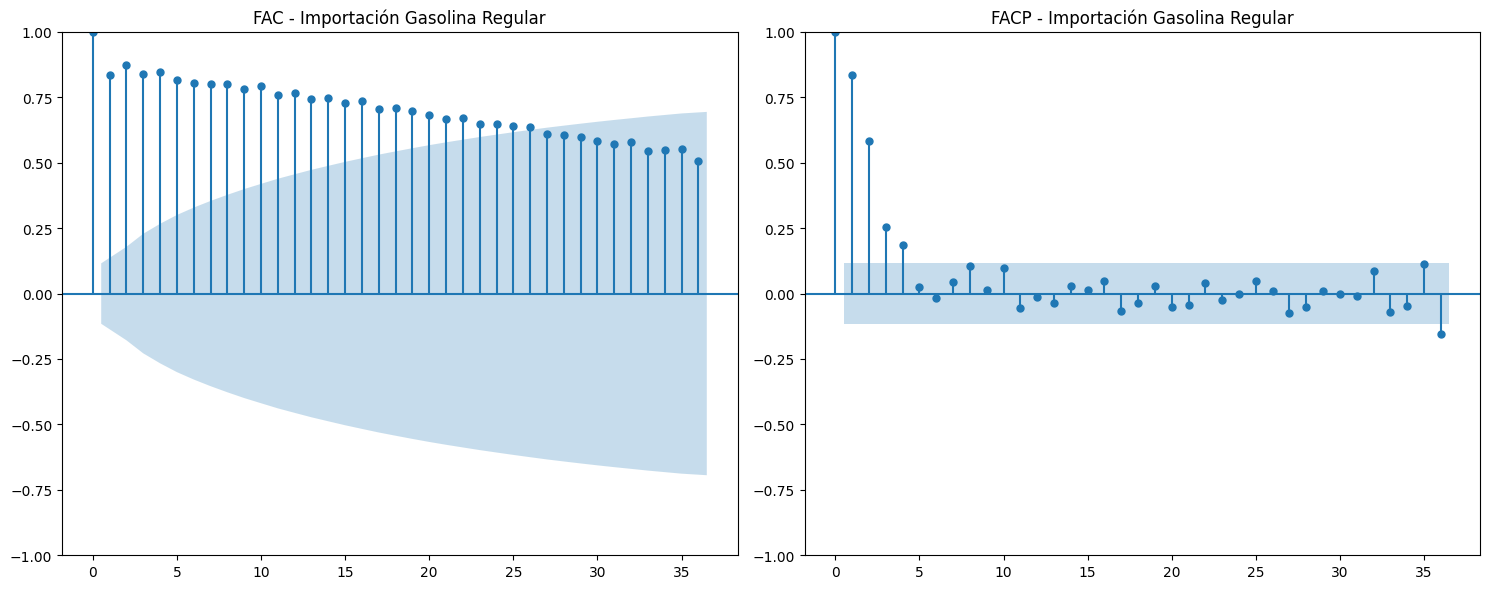

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Importación - Gasolina regular
serie = df_importacion['Gasolina regular']

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_acf(serie, lags=36, ax=plt.gca())
plt.title("FAC - Importación Gasolina Regular")

plt.subplot(1,2,2)
plot_pacf(serie, lags=36, ax=plt.gca())
plt.title("FACP - Importación Gasolina Regular")

plt.tight_layout()
plt.show()


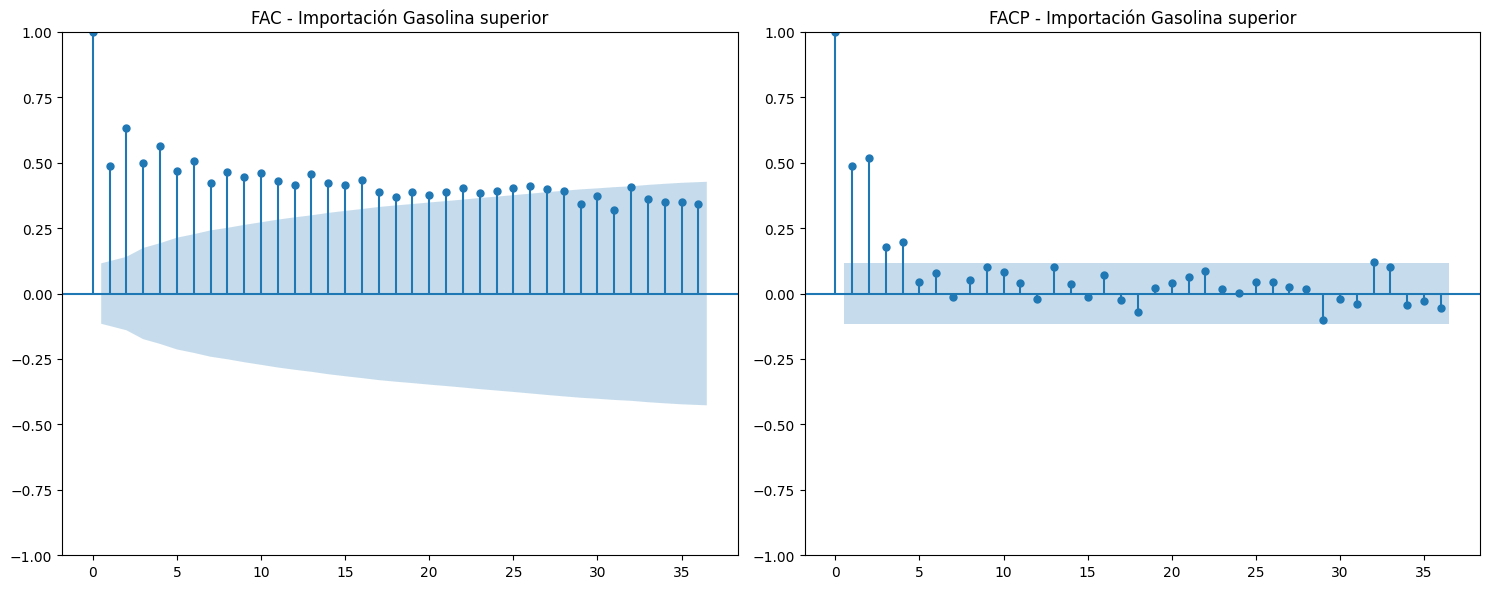

In [30]:
# Importación - Gasolina superior
serie = df_importacion['Gasolina superior']

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_acf(serie, lags=36, ax=plt.gca())
plt.title("FAC - Importación Gasolina superior")

plt.subplot(1,2,2)
plot_pacf(serie, lags=36, ax=plt.gca())
plt.title("FACP - Importación Gasolina superior")

plt.tight_layout()
plt.show()


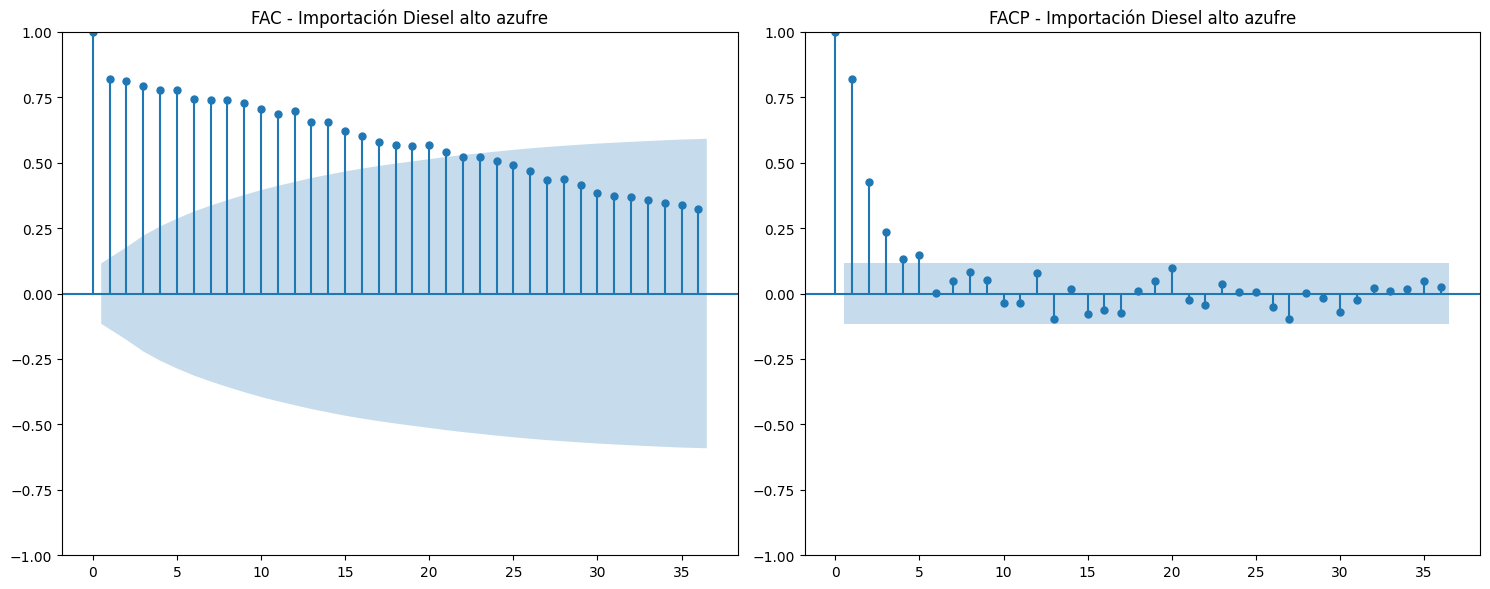

In [31]:
# Importación - Diesel alto azufre
serie = df_importacion['Diesel alto azufre']

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_acf(serie, lags=36, ax=plt.gca())
plt.title("FAC - Importación Diesel alto azufre")

plt.subplot(1,2,2)
plot_pacf(serie, lags=36, ax=plt.gca())
plt.title("FACP - Importación Diesel alto azufre")

plt.tight_layout()
plt.show()


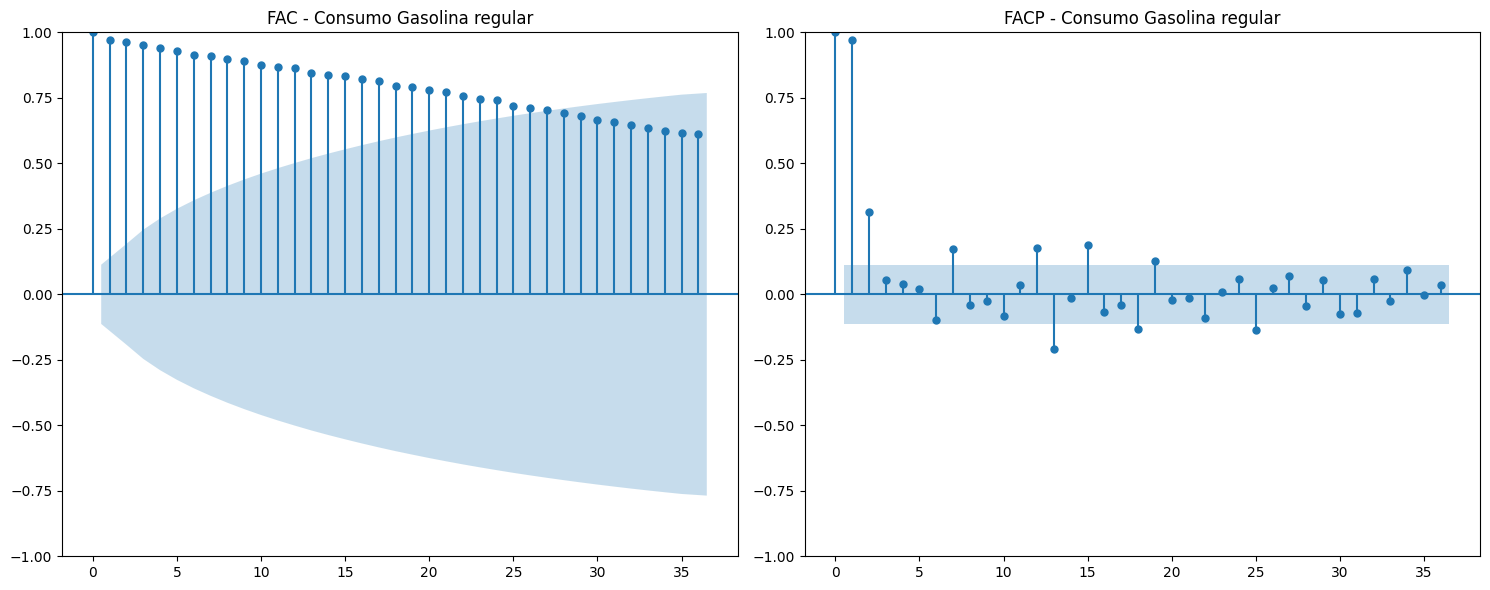

In [34]:
# Consumo - Gasolina regular
serie = df_consumo['Gasolina regular']

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_acf(serie, lags=36, ax=plt.gca())
plt.title("FAC - Consumo Gasolina regular")

plt.subplot(1,2,2)
plot_pacf(serie, lags=36, ax=plt.gca())
plt.title("FACP - Consumo Gasolina regular")

plt.tight_layout()
plt.show()

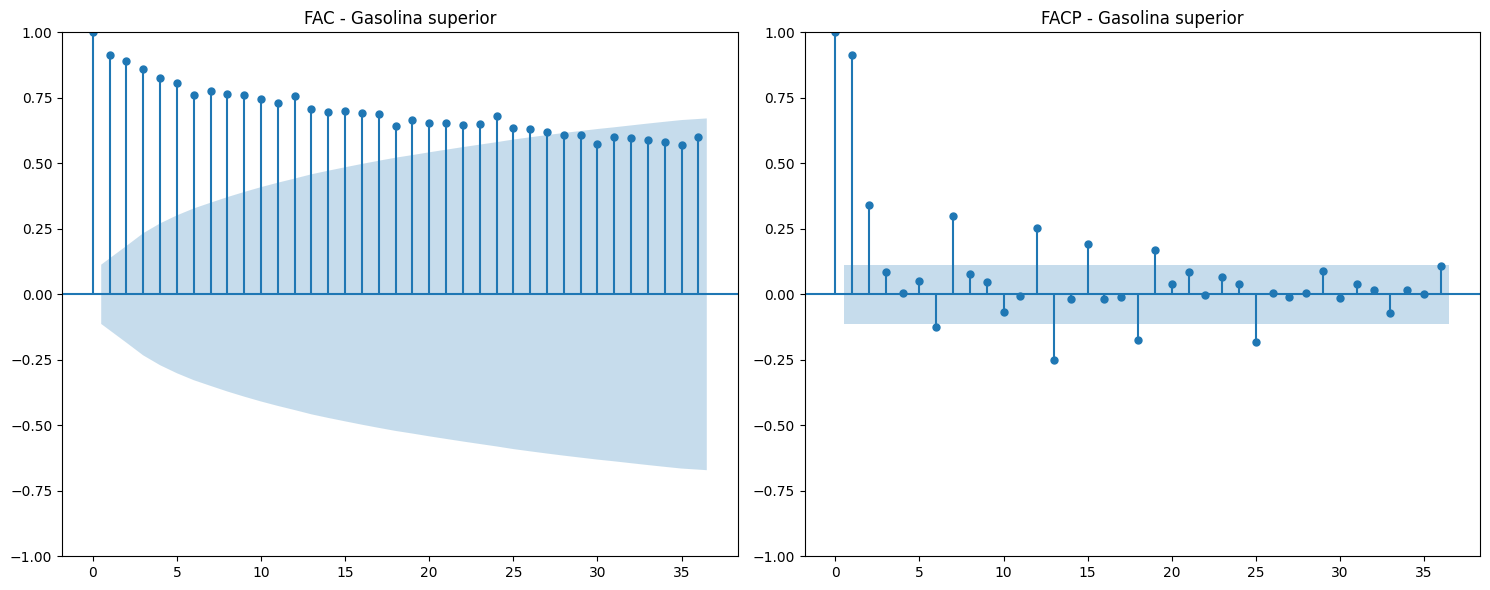

In [33]:
# Consumo - Gasolina superior
serie = df_consumo['Gasolina superior']

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_acf(serie, lags=36, ax=plt.gca())
plt.title("FAC - Gasolina superior")

plt.subplot(1,2,2)
plot_pacf(serie, lags=36, ax=plt.gca())
plt.title("FACP - Gasolina superior")

plt.tight_layout()
plt.show()

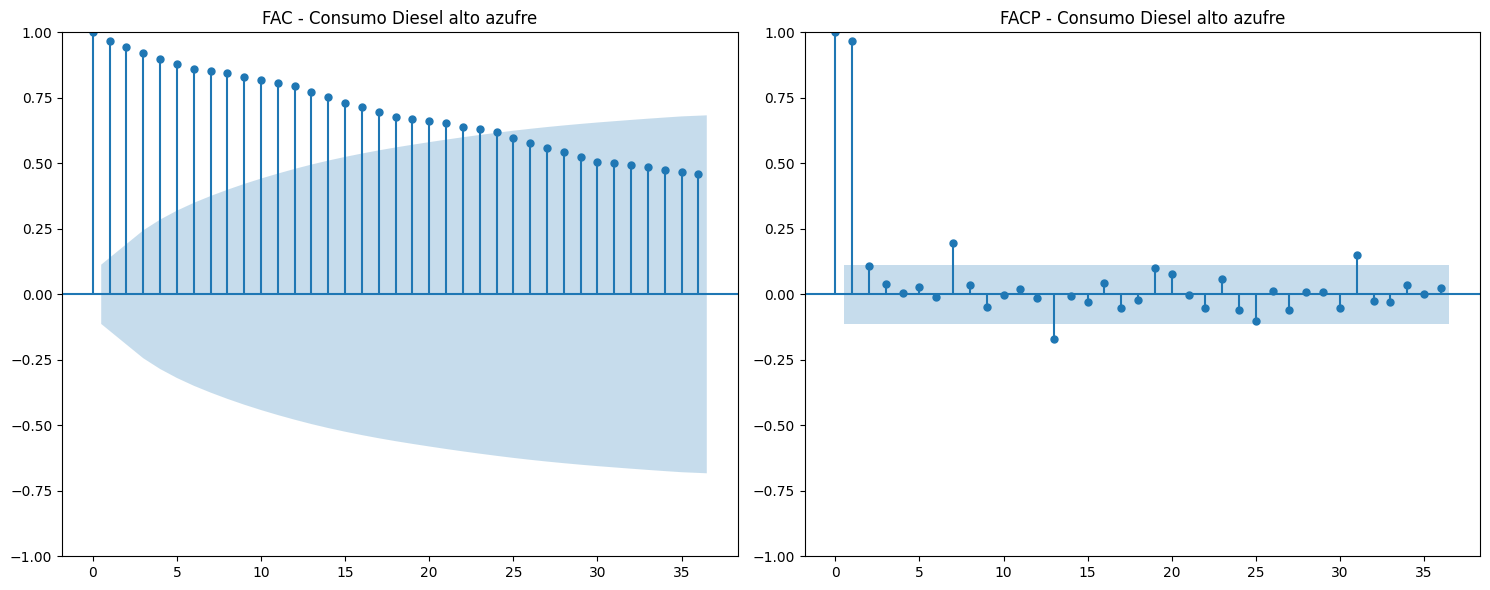

In [32]:
# Consumo - Diesel alto azufre
serie = df_consumo['Diesel alto azufre']

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plot_acf(serie, lags=36, ax=plt.gca())
plt.title("FAC - Consumo Diesel alto azufre")

plt.subplot(1,2,2)
plot_pacf(serie, lags=36, ax=plt.gca())
plt.title("FACP - Consumo Diesel alto azufre")

plt.tight_layout()
plt.show()
